In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
combine_data = pd.read_csv('2018_nfl_combine.csv')

In [3]:
combine_data.shape

(6218, 16)

In [4]:
combine_data.head()

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,AbraJo00,26.0,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,AlexSh00,26.0,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,0.0,NaN,NaN,NaN
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,AndeRa21,6.0,Carolina Panthers,1.0,23.0


In [5]:
combine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6218 entries, 0 to 6217
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Player     6218 non-null   object 
 1   Pos        6218 non-null   object 
 2   Ht         6218 non-null   int64  
 3   Wt         6218 non-null   int64  
 4   Forty      6046 non-null   float64
 5   Vertical   4796 non-null   float64
 6   BenchReps  4212 non-null   float64
 7   BroadJump  4754 non-null   float64
 8   Cone       3993 non-null   float64
 9   Shuttle    4063 non-null   float64
 10  Year       6218 non-null   int64  
 11  Pfr_ID     4895 non-null   object 
 12  AV         6218 non-null   float64
 13  Team       3738 non-null   object 
 14  Round      3738 non-null   float64
 15  Pick       3738 non-null   float64
dtypes: float64(9), int64(3), object(4)
memory usage: 777.4+ KB


In [6]:
combine_data.describe()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,AV,Round,Pick
count,6218.000000,6218.000000,6046.000000,4796.000000,4212.000000,4754.000000,3993.000000,4063.000000,6218.000000,6218.000000,3738.000000,3738.000000
mean,73.798971,243.372145,4.783784,32.818599,20.926163,113.943837,7.282307,4.390603,2009.041975,5.085719,3.838684,113.728464
std,2.621373,45.103814,0.305984,4.213729,6.393679,9.317031,0.422882,0.268836,5.471056,7.546556,1.952728,70.605155
min,65.000000,149.000000,4.220000,17.500000,2.000000,74.000000,6.280000,3.730000,2000.000000,-4.000000,1.000000,1.000000
25%,72.000000,206.000000,4.540000,30.000000,16.000000,108.000000,6.970000,4.190000,2004.000000,0.000000,2.000000,53.000000
50%,74.000000,233.000000,4.700000,33.000000,21.000000,115.000000,7.190000,4.350000,2009.000000,1.000000,4.000000,108.000000
75%,76.000000,281.000000,4.980000,35.500000,25.000000,121.000000,7.540000,4.560000,2014.000000,8.000000,5.000000,169.000000
max,82.000000,375.000000,6.050000,46.000000,49.000000,147.000000,9.120000,5.560000,2018.000000,51.000000,7.000000,260.000000


In [7]:
def handle_missing_values(df, prop_required_column = .60, prop_required_row = .60):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [8]:
combine_data = handle_missing_values(combine_data)

In [9]:
combine_data

,Player,Pos,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,Year,Pfr_ID,AV,Team,Round,Pick
0,John Abraham,OLB,76,252,4.55,NaN,NaN,NaN,NaN,NaN,2000,AbraJo00,26.0,New York Jets,1.0,13.0
1,Shaun Alexander,RB,72,218,4.58,NaN,NaN,NaN,NaN,NaN,2000,AlexSh00,26.0,Seattle Seahawks,1.0,19.0
2,Darnell Alford,OT,76,334,5.56,25.0,23.0,94.0,8.48,4.98,2000,AlfoDa20,0.0,Kansas City Chiefs,6.0,188.0
3,Kyle Allamon,TE,74,253,4.97,29.0,NaN,104.0,7.29,4.49,2000,NaN,0.0,NaN,NaN,NaN
4,Rashard Anderson,CB,74,206,4.55,34.0,NaN,123.0,7.18,4.15,2000,AndeRa21,6.0,Carolina Panthers,1.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,Logan Woodside,QB,73,213,4.79,31.5,NaN,103.0,6.94,4.15,2018,WoodLo00,0.0,NaN,NaN,NaN
6213,Chris Worley,ILB,74,238,4.86,29.5,15.0,NaN,NaN,NaN,2018,WorlCh00,0.0,NaN,NaN,NaN
6215,Isaac Yiadom,CB,73,190,4.52,NaN,8.0,120.0,NaN,4.18,2018,YiadIs00,0.0,NaN,NaN,NaN
6216,Kenny Young,ILB,73,236,4.60,36.0,23.0,117.0,7.38,4.48,2018,NaN,0.0,NaN,NaN,NaN


In [10]:
combine_data.isnull().sum()

Player          0
Pos             0
Ht              0
Wt              0
Forty          74
Vertical      843
BenchReps    1599
BroadJump     873
Cone         1577
Shuttle      1509
Year            0
Pfr_ID        940
AV              0
Team         1828
Round        1828
Pick         1828
dtype: int64

In [11]:
combine_data = combine_data.dropna()

In [12]:
combine_data.isnull().sum()

Player       0
Pos          0
Ht           0
Wt           0
Forty        0
Vertical     0
BenchReps    0
BroadJump    0
Cone         0
Shuttle      0
Year         0
Pfr_ID       0
AV           0
Team         0
Round        0
Pick         0
dtype: int64

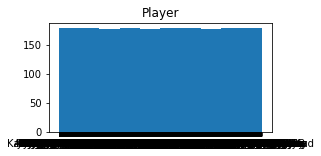

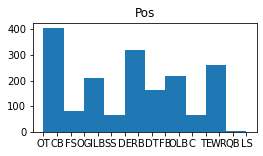

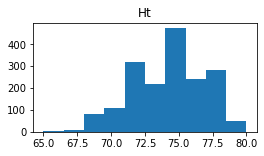

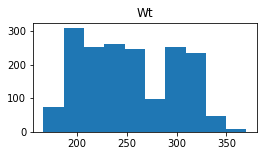

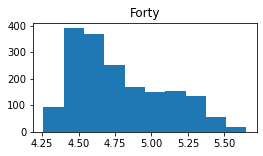

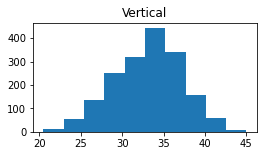

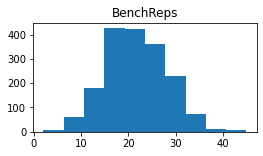

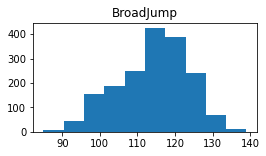

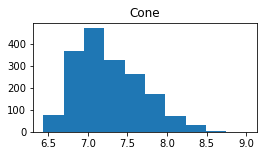

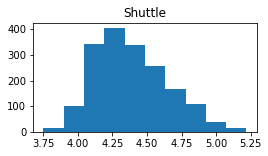

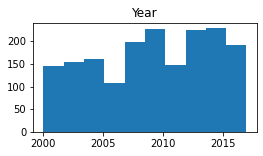

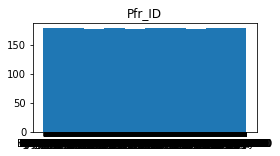

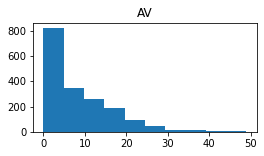

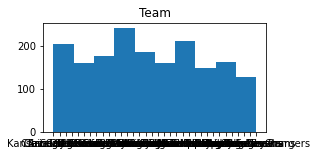

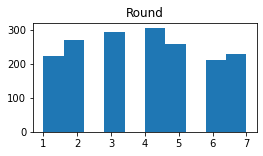

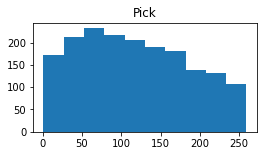

In [13]:
for col in combine_data.columns:
    plt.figure(figsize=(4,2))
    plt.hist(combine_data[col])
    plt.title(col)
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import sklearn.preprocessing

In [15]:
def train_validate_test(df):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 30% of the entire dataframe, 
    a validate, which is 28% of the entire dataframe,
    and a train, which is 42% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (30%) and train_validate (70%)
    train_validate, test = train_test_split(df, test_size=.3, random_state=123)

    # split train_validate off into train (60% of 70% = 42%) and validate (40% of 70% = 28%)
    train, validate = train_test_split(train_validate, test_size=.4, random_state=123)

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns= ['Pick', 'Pfr_ID'])
    X_validate = validate.drop(columns= ['Pick', 'Pfr_ID'])
    X_test = test.drop(columns= ['Pick', 'Pfr_ID'])

    y_train = train[['Pick']]
    y_validate = validate[['Pick']]
    y_test = test[['Pick']]
    return X_train, y_train, X_validate, y_validate, X_test, y_test

In [16]:
X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(combine_data)

In [17]:
def min_max_scale(X_train, X_validate, X_test):
    '''
    this function takes in 3 dataframes with the same columns, 
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler. 
    it returns 3 dataframes with the same column names and scaled values. 
    '''
    # create the scaler object and fit it to X_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).
    X_train = X_train.drop(columns= ['Team', 'Player', 'Pos', 'Round', 'Year'])
    X_validate = X_validate.drop(columns= ['Team', 'Player', 'Pos', 'Round', 'Year'])
    X_test = X_test.drop(columns= ['Team', 'Player', 'Pos', 'Round', 'Year'])
    
    scaler = MinMaxScaler(copy = True).fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns.values).set_index([X_train.index.values])
    X_validate_scaled = pd.DataFrame(X_validate_scaled, columns = X_validate.columns.values).set_index([X_validate.index.values])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns.values).set_index([X_test.index.values])

    
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [18]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test)

In [19]:
X_train_scaled.head()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,AV
5436,0.384615,0.131313,0.126866,0.688889,0.309524,0.829787,0.182540,0.375887,0.083333
4551,0.384615,0.207071,0.134328,0.688889,0.547619,0.638298,0.210317,0.312057,0.104167
2445,0.692308,0.575758,0.522388,0.333333,0.595238,0.382979,0.519841,0.460993,0.166667
3077,0.461538,0.297980,0.179104,0.600000,0.642857,0.638298,0.150794,0.276596,0.208333
4648,0.692308,0.712121,0.723881,0.288889,0.571429,0.191489,0.583333,0.716312,0.000000


In [20]:
#Import kmeans to create clusters on the selected features
from sklearn.cluster import KMeans
X1 = X_train_scaled[['Ht', 'Wt', 'Forty', 'Vertical']]
X2 = X_validate_scaled[['Ht', 'Wt', 'Forty', 'Vertical']]
X3 = X_test_scaled[['Ht', 'Wt', 'Forty', 'Vertical']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X1)

KMeans(n_clusters=3)

In [21]:
X1.shape

(750, 4)

In [22]:
X_train_scaled['cluster'] = kmeans.predict(X1)
X_train['cluster'] = kmeans.predict(X1)
X_validate_scaled['cluster'] = kmeans.predict(X2)
X_validate['cluster'] = kmeans.predict(X2)
X_test_scaled['cluster'] = kmeans.predict(X3)
X_test['cluster'] = kmeans.predict(X3)

In [23]:
X_train.groupby('cluster').describe()

Ht                                                        Wt  \
         count       mean       std   min   25%   50%   75%   max  count   
cluster                                                                    
0        206.0  76.485437  1.585693  72.0  75.0  76.0  78.0  80.0  206.0   
1        313.0  71.498403  1.643021  67.0  70.0  72.0  73.0  76.0  313.0   
2        231.0  75.216450  1.595071  71.0  74.0  75.0  76.0  80.0  231.0   

                     ...    AV        Round                                \
               mean  ...   75%   max  count      mean       std  min  25%   
cluster              ...                                                    
0        312.000000  ...  14.0  36.0  206.0  3.883495  2.063863  1.0  2.0   
1        206.364217  ...  12.0  48.0  313.0  3.929712  1.808503  1.0  3.0   
2        260.043290  ...  13.0  45.0  231.0  3.731602  2.016626  1.0  2.0   

                        
         50%  75%  max  
cluster                 
0        4.0  6.0  7.0  
1        4.0  5.0  7.0  
2        3.0  5.0  7.0  

[3 rows x 88 columns]

In [24]:
X_train_scaled.groupby('cluster').size()

cluster
0    206
1    313
2    231
dtype: int64

[Text(0, 0.5, 'Forty Time'), Text(0.5, 0, 'Vertical')]

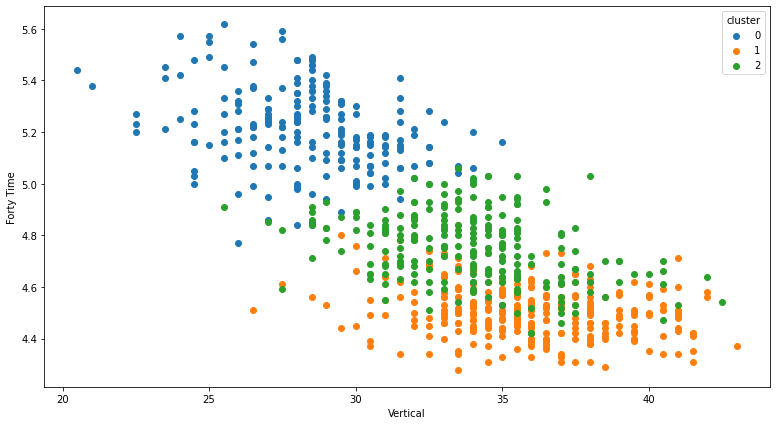

In [25]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in X_train.groupby('cluster'):
    ax.scatter(subset.Vertical, subset.Forty, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='Forty Time', xlabel='Vertical')

In [26]:
kmeans.inertia_

35.6056303242313

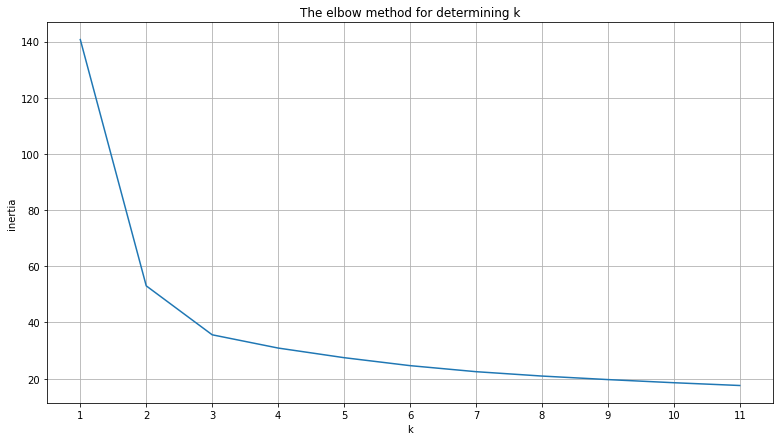

In [27]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

Text(0.5, 1.0, 'Player Ht vs Wt by Clusters')

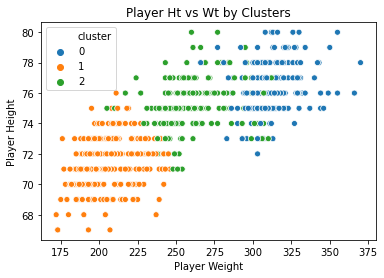

In [28]:
import seaborn as sns

sns.scatterplot(x='Wt', y='Ht', hue='cluster', data=X_train, palette='tab10')
plt.ylabel('Player Height')
plt.xlabel('Player Weight')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Player Ht vs Wt by Clusters')

In [29]:
X_train_scaled.head()

,Ht,Wt,Forty,Vertical,BenchReps,BroadJump,Cone,Shuttle,AV,cluster
5436,0.384615,0.131313,0.126866,0.688889,0.309524,0.829787,0.182540,0.375887,0.083333,1
4551,0.384615,0.207071,0.134328,0.688889,0.547619,0.638298,0.210317,0.312057,0.104167,1
2445,0.692308,0.575758,0.522388,0.333333,0.595238,0.382979,0.519841,0.460993,0.166667,0
3077,0.461538,0.297980,0.179104,0.600000,0.642857,0.638298,0.150794,0.276596,0.208333,1
4648,0.692308,0.712121,0.723881,0.288889,0.571429,0.191489,0.583333,0.716312,0.000000,0


In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [31]:
## Assessing the RFE using a linear regression model
lm = LinearRegression()

rfe = RFE(lm, 4)
lm_X_rfe_train = rfe.fit_transform(X_train_scaled,y_train)
lm_X_rfe_val = rfe.fit_transform(X_validate_scaled,y_validate)
lm_X_rfe_test = rfe.fit_transform(X_test_scaled,y_test)

In [32]:
## Here we want to filter through and return only the best features
mask = rfe.support_ 
rfe_features = X_train_scaled.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 4 features: Wt, Forty, BroadJump, AV


In [33]:
# Fit the model to the train dataset
lm.fit(lm_X_rfe_train, y_train)

LinearRegression()

In [34]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("features: ", rfe_features)

print("coefficients: ", lm.coef_)

Linear Model: LinearRegression()
intercept:  [198.13205017]
features:  Index(['Wt', 'Forty', 'BroadJump', 'AV'], dtype='object')
coefficients:  [[-119.79787013   85.57356935  -63.95091457 -195.41475985]]


In [35]:
## Here we're going to add a column that will make pick predictions using the linear model
y_train['yhat_lm'] = lm.predict(lm_X_rfe_train)

y_train.head()

,Pick,yhat_lm
5436,112.0,123.907149
4551,84.0,123.644941
2445,132.0,116.799163
3077,250.0,96.230173
4648,143.0,162.520572


In [36]:
import numpy as np
from sklearn.metrics import mean_squared_error, explained_variance_score

## Checking the mean squared error of the model
RMSE_lm = np.sqrt(mean_squared_error(y_train.Pick, y_train.yhat_lm))
RMSE_lm

58.61629916938053

In [37]:
r2_lm = lm.score(lm_X_rfe_train, y_train.Pick)
r2_lm

0.30675929774975474

# Validate for Linear Regression Model

In [38]:
lm.fit(lm_X_rfe_val, y_validate)

LinearRegression()

In [39]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("features: ", rfe_features)

print("coefficients: ", lm.coef_)

Linear Model: LinearRegression()
intercept:  [188.03939032]
features:  Index(['Wt', 'Forty', 'BroadJump', 'AV'], dtype='object')
coefficients:  [[-110.2057985    93.19864801  -49.51505409 -199.71342238]]


In [40]:

## Here we're going to add a column that will make draft pick predictions on the validate dataset using the linear model
y_validate['yhat_lm'] = lm.predict(lm_X_rfe_val)

y_validate.head()

,Pick,yhat_lm
4929,171.0,152.976431
2851,96.0,129.900122
5404,20.0,84.920036
5845,111.0,161.916021
2873,125.0,144.642538


66.66742054481071
0.0


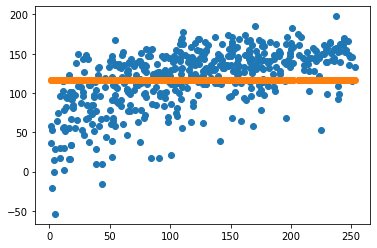

In [41]:
y_validate['yhat_baseline'] = combine_data['Pick'].mean()

# compute the RMSE
RMSE_bl = np.sqrt(mean_squared_error(y_validate.Pick, y_validate.yhat_baseline))
print(RMSE_bl)

# no need to compute R-2 because it will be a 0! But we will demonstrate here:
evs = explained_variance_score(y_validate.Pick, y_validate.yhat_baseline)
print(evs)
plt.scatter(y_validate.Pick, y_validate.yhat_lm, label='Linear Regression Model Predictions', marker='o')
plt.scatter(y_validate.Pick, y_validate.yhat_baseline, label='Baseline Predicitions', marker='o')

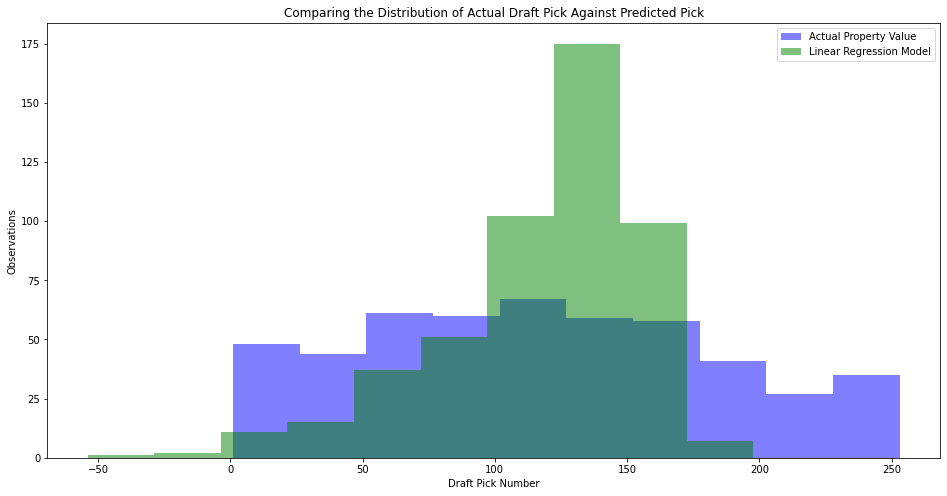

In [42]:

# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.Pick, color='blue', alpha=.5, label="Actual Property Value")
plt.hist(y_validate.yhat_lm, color='green', alpha=.5, label="Linear Regression Model")
plt.xlabel("Draft Pick Number")
plt.ylabel("Observations")
plt.title("Comparing the Distribution of Actual Draft Pick Against Predicted Pick")
plt.legend()
plt.show()

In [43]:
X_train.dtypes

Player        object
Pos           object
Ht             int64
Wt             int64
Forty        float64
Vertical     float64
BenchReps    float64
BroadJump    float64
Cone         float64
Shuttle      float64
Year           int64
AV           float64
Team          object
Round        float64
cluster        int32
dtype: object

In [44]:
from sklearn.preprocessing import PolynomialFeatures
# fitting the train, validate, and test dataset
poly_X_rfe_train = rfe.fit_transform(X_train_scaled, y_train)
poly_X_rfe_val = rfe.transform(X_validate_scaled)
poly_X_rfe_test = rfe.transform(X_test_scaled)

# selecting the degree we would like to polynomaial to assess
pf_4 = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree4 = pf_4.fit_transform(poly_X_rfe_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree4 = pf_4.transform(poly_X_rfe_val)
X_test_degree4 = pf_4.transform(poly_X_rfe_test)

In [45]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree4, y_train.Pick)

# predict train
y_train['yhat_poly_1'] = lm2.predict(X_train_degree4)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Pick, y_train.yhat_poly_1)**1/2

# predict validate
y_validate['yhat_poly_1'] = lm2.predict(X_validate_degree4)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Pick, y_validate.yhat_poly_1)**1/2

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", '{:.33f}'.format(rmse_train), 
      "\nValidation/Out-of-Sample: ", '{:.33f}'.format(rmse_validate))

RMSE for Polynomial Model, degrees=4
Training/In-Sample:  1501.569159789966761309187859296798706 
Validation/Out-of-Sample:  1602.995812018637025175848975777626038


In [46]:
# make the polynomial features to get a new set of features
pf_3 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf_3.fit_transform(poly_X_rfe_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf_3.transform(poly_X_rfe_val)
X_test_degree3 = pf_3.transform(poly_X_rfe_test)

In [47]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree3, y_train.Pick)

# predict train
y_train['yhat_poly_2'] = lm2.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Pick, y_train.yhat_poly_2)**1/2

# predict validate
y_validate['yhat_poly_2'] = lm2.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Pick, y_validate.yhat_poly_2)**1/2

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", '{:.33f}'.format(rmse_train), 
      "\nValidation/Out-of-Sample: ", '{:.33f}'.format(rmse_validate))

RMSE for Polynomial Model, degrees=3
Training/In-Sample:  1569.392801600859911559382453560829163 
Validation/Out-of-Sample:  1460.838101829186143731931224465370178


In [48]:
# make the polynomial features to get a new set of features
pf_2 = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf_2.fit_transform(poly_X_rfe_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf_2.transform(poly_X_rfe_val)
X_test_degree2 = pf_2.transform(poly_X_rfe_test)

In [49]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.Pick)

# predict train
y_train['yhat_poly_3'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.Pick, y_train.yhat_poly_3)**1/2

# predict validate
y_validate['yhat_poly_3'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Pick, y_validate.yhat_poly_3)**1/2

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", '{:.33f}'.format(rmse_train), 
      "\nValidation/Out-of-Sample: ", '{:.33f}'.format(rmse_validate))

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  1618.003593071147179216495715081691742 
Validation/Out-of-Sample:  1454.724619710669912819867022335529327


In [50]:
y_validate.head()

,Pick,yhat_lm,yhat_baseline,yhat_poly_1,yhat_poly_2,yhat_poly_3
4929,171.0,152.976431,116.733632,165.848145,159.491431,156.195550
2851,96.0,129.900122,116.733632,119.543219,107.122614,123.345505
5404,20.0,84.920036,116.733632,31.986520,50.090693,55.860270
5845,111.0,161.916021,116.733632,165.870279,164.293029,163.490003
2873,125.0,144.642538,116.733632,154.829674,158.353657,137.550973


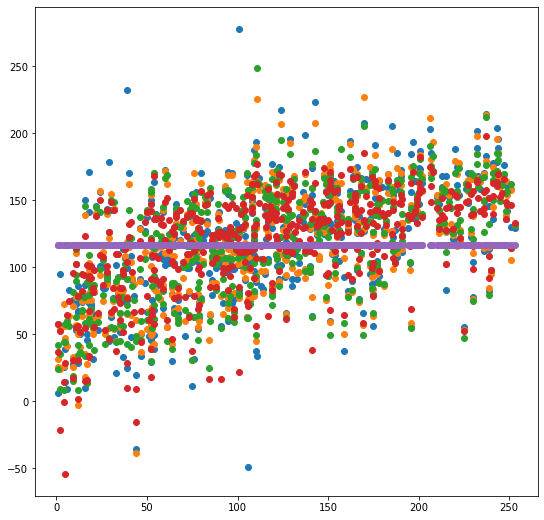

In [51]:
plt.figure(figsize=(9, 9))
plt.scatter(y_validate.Pick, y_validate.yhat_poly_1, label='4 Degree Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.Pick, y_validate.yhat_poly_2, label='3 Degree Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.Pick, y_validate.yhat_poly_3, label='2 Degree Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.Pick, y_validate.yhat_lm, label='Linear Regression Model Predictions', marker='o')
plt.scatter(y_validate.Pick, y_validate.yhat_baseline, label='Baseline Predicitions', marker='o')

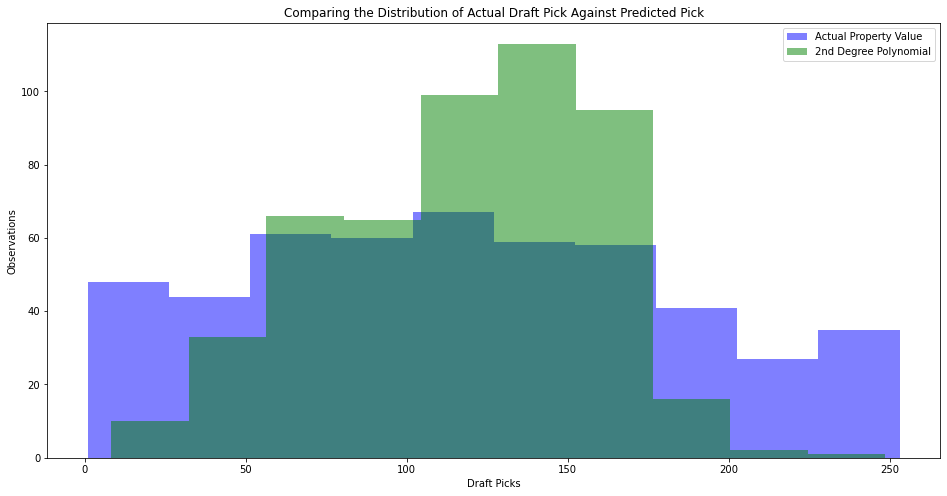

In [55]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.Pick, color='blue', alpha=.5, label="Actual Property Value")
plt.hist(y_validate.yhat_poly_3, color='green', alpha=.5, label="2nd Degree Polynomial")
plt.xlabel("Draft Picks")
plt.ylabel("Observations")
plt.title("Comparing the Distribution of Actual Draft Pick Against Predicted Pick")
plt.legend()
plt.show()

In [57]:
# predict validate
y_test['yhat_poly'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.Pick, y_test.yhat_poly)**1/2

print("RMSE for Polynomial Model, degrees=2\nValidation/Out-Of-Sample: ", '{:.33f}'.format(rmse_validate), 
      "\nTest/Out-of-Sample: ", '{:.33f}'.format(rmse_test))

RMSE for Polynomial Model, degrees=2
Validation/Out-Of-Sample:  1454.724619710669912819867022335529327 
Test/Out-of-Sample:  1573.152308848304528510197997093200684


In [58]:
y_test.head()

,Pick,yhat_poly
2621,70.0,112.615996
4553,28.0,61.699467
2061,38.0,24.539233
2391,70.0,92.301993
3207,2.0,112.718331


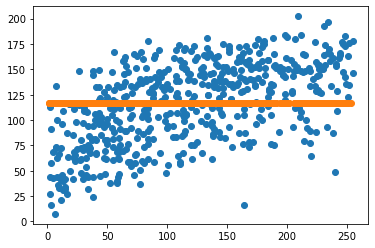

In [60]:
plt.scatter(y_test.Pick, y_test.yhat_poly, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.Pick, y_validate.yhat_baseline, label='Baseline Predicitions', marker='o')

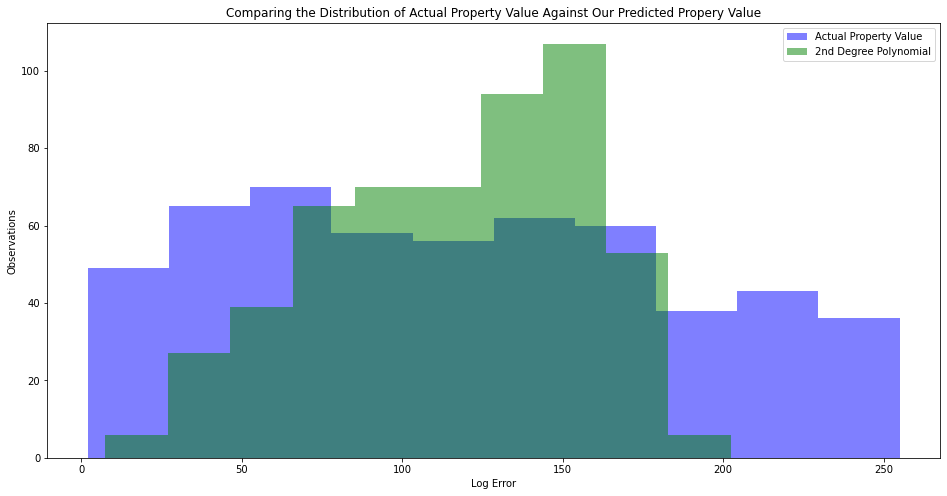

In [62]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_test.Pick, color='blue', alpha=.5, label="Actual Property Value")
plt.hist(y_test.yhat_poly, color='green', alpha=.5, label="2nd Degree Polynomial")
plt.xlabel("Log Error")
plt.ylabel("Observations")
plt.title("Comparing the Distribution of Actual Property Value Against Our Predicted Propery Value")
plt.legend()
plt.show()

In [64]:
y_test['perc_error'] = ((y_test.Pick - y_test.yhat_poly) / y_test.Pick) * 100
y_test

,Pick,yhat_poly,perc_error
2621,70.0,112.615996,-60.879994
4553,28.0,61.699467,-120.355239
2061,38.0,24.539233,35.423070
2391,70.0,92.301993,-31.859990
3207,2.0,112.718331,-5535.916527
...,...,...,...
1116,147.0,131.358141,10.640720
4655,182.0,144.838177,20.418584
3920,242.0,109.407543,54.790271
724,107.0,138.104953,-29.070050


In [65]:
print('The MVP Model was, ''{:.33f}'.format(y_test.perc_error.sum()), '% off actual')

The MVP Model was, -40268.801663776837813202291727066040039 % off actual
